# Pymaceuticals Inc.
---

### Analysis

- From the Boxplot, it was observed that the drugs Capomulin and Ramicane are the most efficient ones in bringing down the tumor volumes. These two drungs also have the maximum Timepoints which suggests that the clinical trial was able to move forward before the mice dies. Ramicane produced better results than the Capomulin, as its final Tumor volume is median value is close to the center of the box, whereas Capomulin median value has moved towards upper value.
- Average tumor volume also depends on the mice's weight. Avg tumor value tends to be higher with the increase in the mice weight.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Naming Index
merged_df.index.name = 'MyIdx'
# Sorting by Timepoint and index
sort_timepoint_merged_df = merged_df.sort_values(by = ['Timepoint', 'MyIdx'], ascending = [True, True])
# Index reset
reset_index_df = sort_timepoint_merged_df.reset_index(drop=True)
# Display the data table for preview
reset_index_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
reset_index_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = reset_index_df.loc[reset_index_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseID_g989 = reset_index_df.loc[reset_index_df["Mouse ID"] == 'g989', :]
mouseID_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
353,g989,5,48.786801,0,Propriva,Female,21,26
354,g989,5,47.570392,0,Propriva,Female,21,26
584,g989,10,51.745156,0,Propriva,Female,21,26
585,g989,10,49.880528,0,Propriva,Female,21,26
805,g989,15,51.325852,1,Propriva,Female,21,26
806,g989,15,53.442020,0,Propriva,Female,21,26
1008,g989,20,55.326122,1,Propriva,Female,21,26
1009,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = reset_index_df[reset_index_df["Mouse ID"]!="g989"]
cleaned_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped = cleaned_mouse_df.groupby("Drug Regimen")
tumor_volume_mean = grouped["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped["Tumor Volume (mm3)"].median()
tumor_volume_var = grouped["Tumor Volume (mm3)"].var()
tumor_volume_stdev = grouped["Tumor Volume (mm3)"].std()
tumor_volume_SEM = grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({
    "Tumor Volume Mean": tumor_volume_mean,
    "Tumor Volume Median": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_var,
    "Tumor Volume Std. Dev.": tumor_volume_stdev,
    "Tumor Volume Std. Err.": tumor_volume_SEM,
})
stats_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

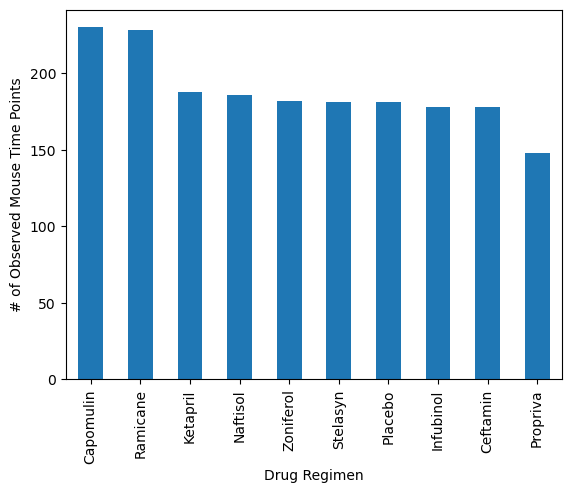

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_mouse_df["Drug Regimen"].value_counts()
drug_regimen_count.plot.bar(xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Time Points")
plt.show()
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

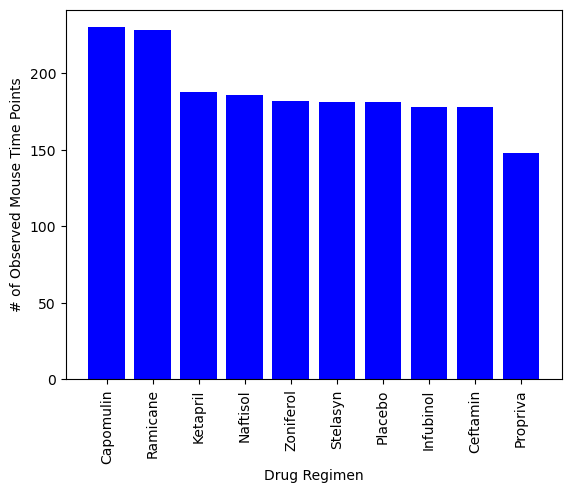

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = drug_regimen_count
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color ="b")
plt.xticks(x_axis, y_axis.index, rotation ="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Time Points")
plt.show()

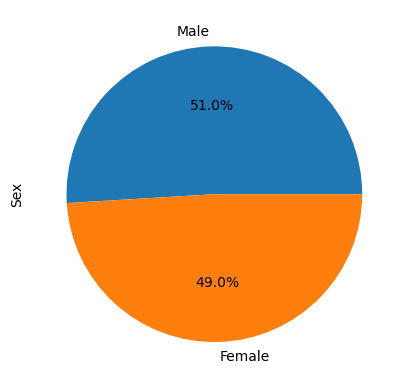

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = cleaned_mouse_df["Sex"].value_counts()
gender_count.plot.pie( ylabel = "Sex",autopct="%1.1f%%")
plt.show()

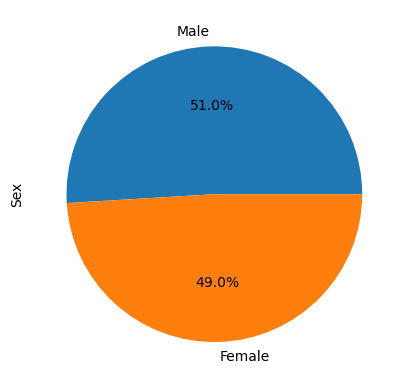

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_count.index
plt.pie(gender_count, labels = labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mouse_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint = pd.DataFrame(last_timepoint)
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_last_point = pd.merge(last_timepoint, cleaned_mouse_df, on = ["Mouse ID","Timepoint"])
tumor_volume_last_point

# Tumor volume at last time point for four regimens
four_regimen = tumor_volume_last_point.loc[tumor_volume_last_point["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_regimen_sort = four_regimen.sort_values('Drug Regimen')
four_regimen_sort = four_regimen_sort.reset_index()
four_regimen_sort
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,115,l897,45,38.846876,1,Capomulin,Male,17,19
1,85,j119,45,38.125164,1,Capomulin,Female,7,23
2,87,j246,35,38.753265,1,Capomulin,Female,21,21
3,192,u364,45,31.023923,3,Capomulin,Male,18,17
4,66,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...
95,91,j913,45,31.560470,1,Ramicane,Female,4,17
96,93,j989,45,36.134852,1,Ramicane,Male,8,19
97,96,k403,45,22.050126,1,Ramicane,Male,21,16
98,119,m546,45,30.564625,1,Ramicane,Male,18,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = four_regimen_sort.loc[four_regimen_sort["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
# add subset 
    tumor_vol_data.append(tumor_volume)
# Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_val = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}’s outliers: {outliers_val}")
    

Capomulin’s outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane’s outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol’s outliers: 64    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin’s outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


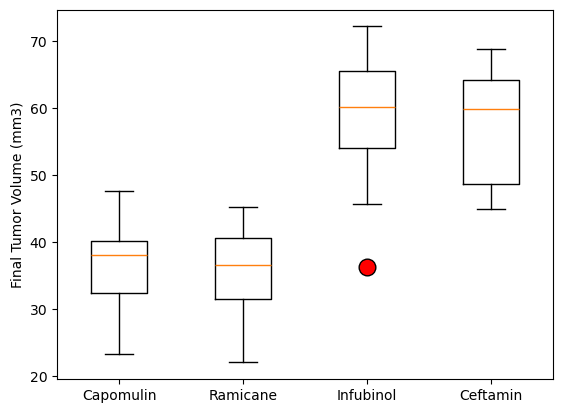

In [80]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_vol_data, labels=treatments,  \
                 flierprops = dict(marker = "o", markersize=12, markerfacecolor = "red"))
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

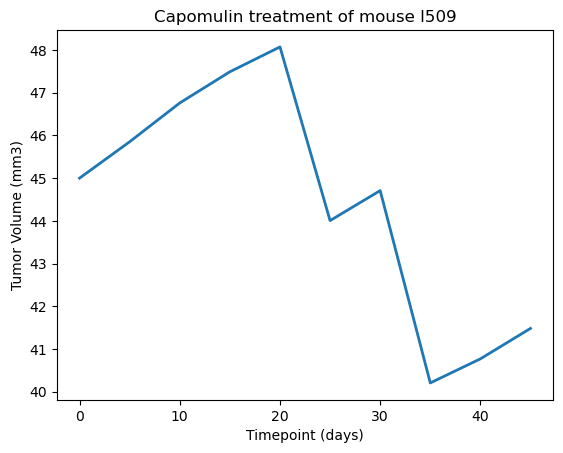

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] =="Capomulin",:]
capomulin_df

capomulin_mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
capomulin_mouse_l509

x_axis = capomulin_mouse_l509["Timepoint"]
capomulin_tumor_vol = capomulin_mouse_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, capomulin_tumor_vol, linewidth=2, label="mm3")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

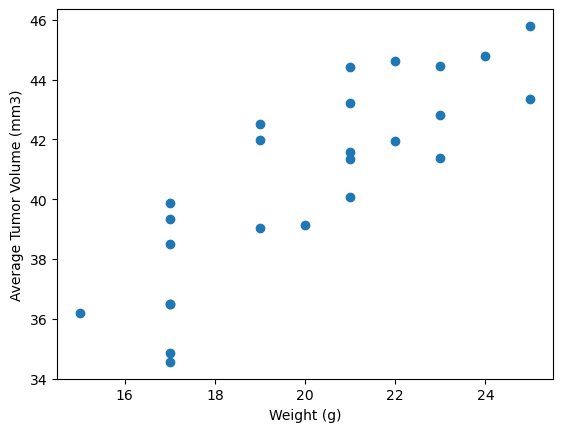

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned_mouse_df.loc[cleaned_mouse_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
avg_tumor_capomulin = capomulin['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin['Weight (g)'].first()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


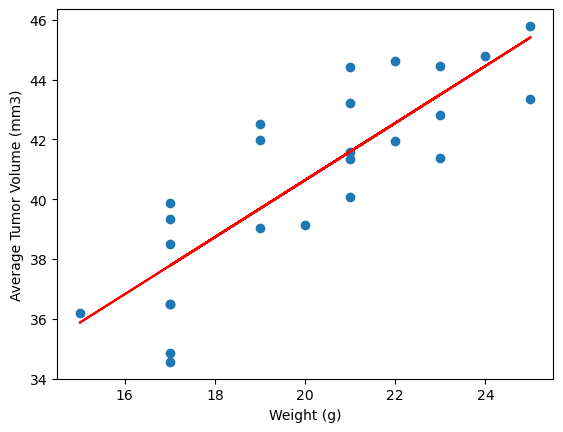

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = mouse_weight
y_values = avg_tumor_capomulin
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(mouse_weight,avg_tumor_capomulin)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show() 